In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
tracking = {}
t0 = time.time()
for y in tqdm([2018, 2019, 2020]):
    tracking[y] = pd.read_csv('./data/tracking' + str(y) + '.csv')
print('Time cost: %8.2f s' % (time.time() - t0))

100%|██████████| 3/3 [00:47<00:00, 15.86s/it]

Time cost:    47.59 s


In [3]:
for k, v in tracking.items():
    print(k, v.shape)

2018 (12777351, 18)
2019 (12170933, 18)
2020 (11821701, 18)


In [4]:
for k, v in tracking.items():
    print(k, list(v.columns))

2018 ['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId', 'displayName', 'jerseyNumber', 'position', 'team', 'frameId', 'gameId', 'playId', 'playDirection']
2019 ['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId', 'displayName', 'jerseyNumber', 'position', 'team', 'frameId', 'gameId', 'playId', 'playDirection']
2020 ['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId', 'displayName', 'jerseyNumber', 'position', 'team', 'frameId', 'gameId', 'playId', 'playDirection']


## Create columns of "Date" and save as a .pkl file

In [23]:
t0 = time.time()
for year in [2018, 2019, 2020]:
    tracking[year]['date'] = tracking[year]['time'].apply(lambda x: x.split('T')[0])
    #tracking[year]['dt'] = tracking[year]['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f'))
print('Time cost: %8.8f s' % (time.time() - t0))

Time cost: 11.26322508 s


In [25]:
import pickle
with open('./data/tracking_all.pkl', 'wb') as f:
    pickle.dump(tracking, f, pickle.HIGHEST_PROTOCOL)

## Some actions to reduce the dataset

In [5]:
for k, v in tracking.items():
    no_players = len(v['nflId'].unique())
    no_plays = len(v['playId'].unique())
    no_games = len(v['gameId'].unique())
    print(k, no_players, no_plays, no_games)

2018 1770 3414 253
2019 1793 3355 255
2020 1879 3270 256


In [8]:
dict_observation_games = {}
for k, v in tracking.items():
    dict_observation_games[k] = v['gameId'].value_counts()

### Histograms of the numbers of obsevations of each unique game in three years

(array([ 1.,  0.,  5., 18., 67., 83., 57., 13.,  5.,  4.]),
 array([11293. , 18464.4, 25635.8, 32807.2, 39978.6, 47150. , 54321.4,
        61492.8, 68664.2, 75835.6, 83007. ]),
 <a list of 10 Patch objects>)

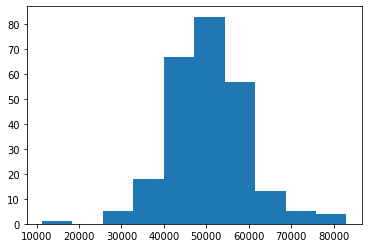

In [11]:
plt.hist(dict_observation_games[2018])

(array([ 6.,  6., 32., 41., 59., 61., 24., 18.,  5.,  3.]),
 array([24610. , 29559.6, 34509.2, 39458.8, 44408.4, 49358. , 54307.6,
        59257.2, 64206.8, 69156.4, 74106. ]),
 <a list of 10 Patch objects>)

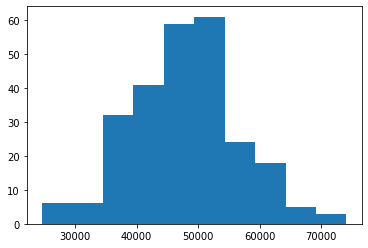

In [12]:
plt.hist(dict_observation_games[2019])

(array([ 1.,  0.,  1.,  5., 19., 69., 82., 54., 22.,  3.]),
 array([ 1403. ,  8392.7, 15382.4, 22372.1, 29361.8, 36351.5, 43341.2,
        50330.9, 57320.6, 64310.3, 71300. ]),
 <a list of 10 Patch objects>)

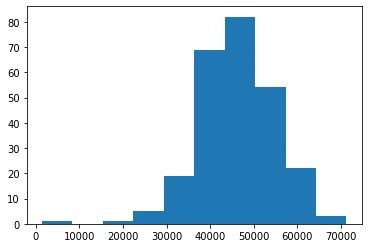

In [13]:
plt.hist(dict_observation_games[2020])

/home/jayliao2/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


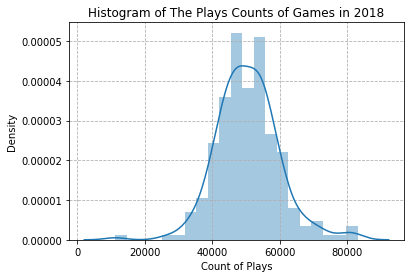

In [37]:
sns.distplot(dict_observation_games[2018])
plt.title('Histogram of The Plays Counts of Games in 2018')
plt.xlabel('Count of Plays')
plt.grid(linestyle='--')
plt.show()

/home/jayliao2/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


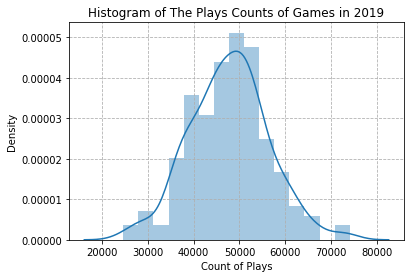

In [38]:
sns.distplot(dict_observation_games[2019])
plt.title('Histogram of The Plays Counts of Games in 2019')
plt.xlabel('Count of Plays')
plt.grid(linestyle='--')
plt.show()

/home/jayliao2/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


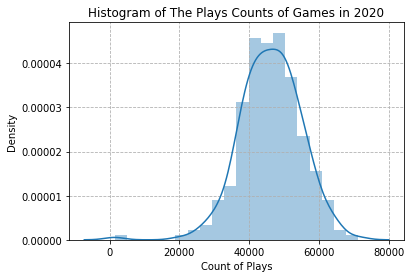

In [39]:
sns.distplot(dict_observation_games[2020])
plt.title('Histogram of The Plays Counts of Games in 2020')
plt.xlabel('Count of Plays')
plt.grid(linestyle='--')
plt.show()

In [17]:
min(dict_observation_games[2018].mode())

45678

In [20]:
S = dict_observation_games[2018]
game_picked = min(S.index[S == min(S.mode())])

In [40]:
game_picked

2020102503

In [26]:
tracking_small = {}

for k, v in tracking.items():
    S = dict_observation_games[k]
    game_picked = min(S.index[S == min(S.mode())])
    tracking_small[k] = v[v['gameId'] == game_picked].copy()
    print(k, game_picked, tracking_small[k].shape)

2018 2018100707 (45678, 19)
2019 2019090804 (37858, 19)
2020 2020102503 (50462, 19)


In [ ]:
with open('./data/tracking_small.pkl', 'wb') as f:
    pickle.dump(tracking_small, f, pickle.HIGHEST_PROTOCOL)

In [21]:
game_picked

2018100707

In [22]:
tracking[2018][tracking[2018]['gameId'] == game_picked]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
9333975,2018-10-07T17:02:34.900,44.01,34.85,0.06,0.05,0.01,110.67,88.49,None,37115.0,Bruce Carter,55.0,ILB,away,1,2018100707,37,right
9333976,2018-10-07T17:02:35.000,44.02,34.84,0.07,0.14,0.01,110.67,131.90,None,37115.0,Bruce Carter,55.0,ILB,away,2,2018100707,37,right
9333977,2018-10-07T17:02:35.100,44.02,34.83,0.14,0.30,0.01,112.84,155.66,None,37115.0,Bruce Carter,55.0,ILB,away,3,2018100707,37,right
9333978,2018-10-07T17:02:35.200,44.03,34.81,0.21,0.42,0.02,112.84,144.12,None,37115.0,Bruce Carter,55.0,ILB,away,4,2018100707,37,right
9333979,2018-10-07T17:02:35.300,44.05,34.79,0.34,0.79,0.03,112.84,127.09,None,37115.0,Bruce Carter,55.0,ILB,away,5,2018100707,37,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379648,2018-10-07T19:55:18.600,118.38,24.77,13.56,6.01,1.39,NaN,NaN,None,NaN,football,NaN,NaN,football,42,2018100707,3830,right
9379649,2018-10-07T19:55:18.700,119.67,24.50,12.83,6.45,1.32,NaN,NaN,None,NaN,football,NaN,NaN,football,43,2018100707,3830,right
9379650,2018-10-07T19:55:18.800,120.87,24.29,11.69,7.72,1.21,NaN,NaN,None,NaN,football,NaN,NaN,football,44,2018100707,3830,right
9379651,2018-10-07T19:55:18.900,121.97,24.12,10.71,8.53,1.12,NaN,NaN,None,NaN,football,NaN,NaN,football,45,2018100707,3830,right


               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


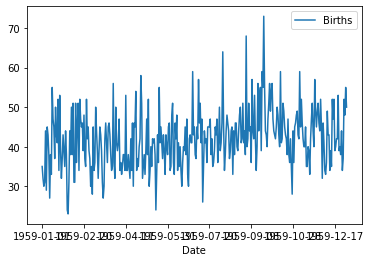

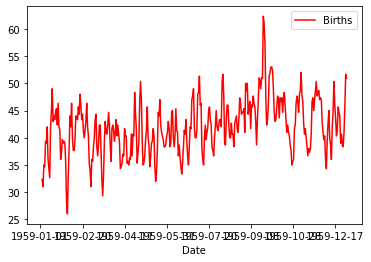

In [5]:
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.legend()
pyplot.show()

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


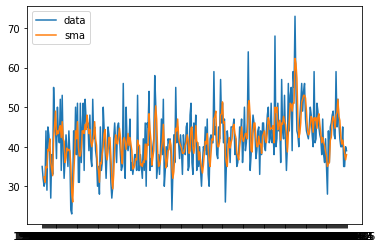

In [23]:
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
pyplot.plot(series.iloc[0:320, :],label="data")
pyplot.plot(rolling_mean.iloc[0:320, :],label="sma")
pyplot.legend(loc=2)
pyplot.show()

In [9]:
# single exponential smoothing
...
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data =read_csv(r'C:\ALL-DATA\Adjunct_Faculty\Time Series Analytics\daily-total-female-births.csv', header=0, index_col=0)
# create class
model = SimpleExpSmoothing(data)
# fit model
model_fit = model.fit()
# make prediction
yhat = model_fit.predict()

C:\Users\anupm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [10]:
yhat

1960-01-01    43.785089
Freq: D, dtype: float64

In [20]:
dataEMA = data.ewm(span=40,adjust=False).mean()

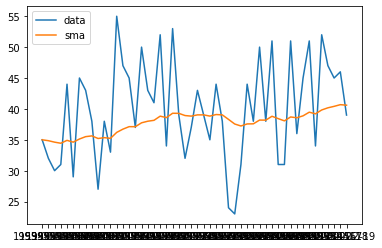

In [21]:
pyplot.plot(data.iloc[0:50, :],label="data")
pyplot.plot(dataEMA.iloc[0:50, :],label="sma")
pyplot.legend(loc=2)
pyplot.show()